In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
points = [(2,0), (6,0), (6,2), (8,2), (8,5), (5,5), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

[[(6, 2), (2, 2)], [(6, 2), (6, 7)], [(7, 5), (0, 5)], [(7, 5), (7, 2)], [(5, 7), (3, 7)], [(5, 7), (5, 0)], [(3, 7), (3, 0)], [(2, 2), (2, 7)]]


<Figure size 432x288 with 0 Axes>

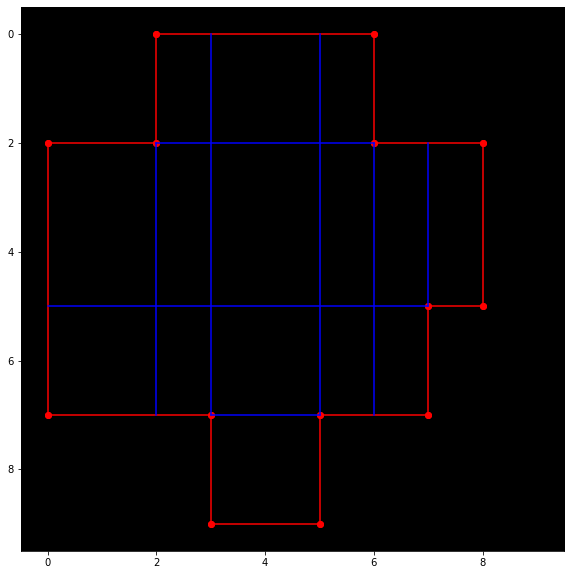

In [3]:
def generateAllBoundaryPoints(points):
    # find the point with the lowest y-coordinate and the lowest x-coordinate
    border = []
    # print(points)
    starting_point = points[0]
    border.append(starting_point)
    current_point = points[0]
    next_point = points[1]
    i = 1
    while (next_point != starting_point):
        # print("Staring from: ", current_point, "To: ", next_point)
        while( current_point != next_point):
            # print(current_point[0]==next_point[0], current_point[1]==next_point[1], current_point[0], next_point[0], current_point[1], next_point[1])
            if(current_point[0]==next_point[0]):
                if(current_point[1]<next_point[1]):
                    current_point = (current_point[0], current_point[1]+1)
                else:
                    current_point = (current_point[0], current_point[1]-1)
            elif(current_point[1]==next_point[1]):
                if(current_point[0]<next_point[0]):
                    current_point = (current_point[0]+1, current_point[1])
                else:
                    current_point = (current_point[0]-1, current_point[1])
            # print("Adding point: ", current_point)
            border.append(current_point)
        if(current_point == next_point):
            # print("Boundary break: ", next_point)
            i += 1
            if(i < len(points)):
                next_point = points[i]
            else:
                # mssing points bettween next_point and starting_point
                # print("mssing points bettween ",next_point ,"and", starting_point)
                if(next_point[0]==starting_point[0]):
                    if(next_point[1]<starting_point[1]):
                        next_point = (next_point[0], next_point[1]+1)
                    else:
                        next_point = (next_point[0], next_point[1]-1)
                elif (next_point[1]==starting_point[1]):
                    if(next_point[0]<starting_point[0]):
                        next_point = (next_point[0]+1, next_point[1])
                    else:
                        next_point = (next_point[0]-1, next_point[1])
                else:
                    next_point = starting_point
    return border

def verifyLineLength(x1, y1, points, edge_x, edge_y):
        if not ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1]):
            return []
        if (x1, y1) not in bounrday:
            return []
        if (x1, y1) in bounrday and len(points) > 0:
            points.append((x1, y1))
        return points

def checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
    return ((x1, y1) not in bounrday ) and ( edge_x[0] <= x1 <= edge_x[1]) and ( edge_y[0] <= y1 <= edge_y[1])

def drawInnerLine(point, bounrday, edge=((0,10), (0,10)), flow="r"):
    x = point[0]
    y = point[1]
    points = []
    edge_x = edge[0]
    edge_y = edge[1]
    if(flow == "r"):
        x1, y1 = x+1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1+1, y1
    elif(flow == "l"):
        x1, y1 = x-1, y
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1-1, y1
    elif(flow == "u"):
        x1, y1 = x, y-1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1-1
    elif(flow == "d"):
        x1, y1 = x, y+1
        while checkPointWithinArea(x1, y1, bounrday, edge_x, edge_y):
            points.append((x1, y1))
            x1, y1 = x1, y1+1
    else:
        return []
    
    points = verifyLineLength(x1, y1, points, edge_x, edge_y)
    allinBoundary = True
    for p in points:
        if p not in bounrday:
            # print(p, " is not in boundary")
            allinBoundary = False
            break
    if(allinBoundary):
        return []

    return points

def isInLineList(line, lineList):
    if line in lineList:
        return True
    tmp_line = [ line[1], line[0] ]
    if tmp_line in lineList:
        return True
    return False


def checkAndAppend(inner_points, intersection_point, cut_lines):
    if len(inner_points) > 0:
        tmp_p = [intersection_point, inner_points[-1]]
        if(not isInLineList(tmp_p, cut_lines)):
            cut_lines.append([intersection_point, inner_points[-1]])
    return cut_lines

def findCutLines(points, edge):
    bounrday = generateAllBoundaryPoints(points)
    start_point = points[0]
    previous_line = None
    cut_lines = []
    for index in range(len(points)):
        x =  points[index]
        if(index >= len(points)-1):
            y = points[0]
        else:
            y = points[index+1]
        if previous_line is None:
            previous_line = [x, y]
        else:
            next_line = [previous_line[1], y]
            intersection_point = previous_line[1]
            # check right side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="r")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check left side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="l")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check top side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="u")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            # check bottom side
            inner_points = drawInnerLine(intersection_point, bounrday, edge, flow="d")
            cut_lines = checkAndAppend(inner_points, intersection_point, cut_lines)
            
            previous_line = next_line    
    return cut_lines


# create a blank image of size 100x100
img = np.zeros((10,10,3), np.uint8)

plt.clf()

fig = plt.figure(figsize=(10, 10))
color =  (255, 0, 0)
# x1, y1 = [0, 0], [20, 20]
bounrday = generateAllBoundaryPoints(points)
start_point = points[0]
previous_line = None

    
edge_x = (0, 9)
edge_y = (0, 9)
edge = (edge_x, edge_y)

cut_lines = findCutLines(points, edge)

print(cut_lines)

for index in range(len(points)):
    x =  points[index]
    if(index >= len(points)-1):
        y = points[0]
    else:
        y = points[index+1]

    x_values = [x[0], y[0]]
    y_values = [x[1], y[1]]
    plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

        
for cut_line in cut_lines:
    x_values = [cut_line[0][0], cut_line[1][0]]
    y_values = [cut_line[0][1], cut_line[1][1]]
    plt.plot(x_values, y_values, color="b", marker="", linestyle="-")

plt.imshow(img)